In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$ y'' + 4y = 8cos(2t) $$
$$ y(0) = 0 $$
$$ y'(0) = 0 $$

La solución análtica es:

$$ y(t)=2tsin(2t) $$

# Aplicando Diferencias finitas:

$$ y_{i-1} + (4h^{2}-2)y_{i} + y_{i+1} = 8h^{2}cos(2t_{i}) $$

No podemos encontrar el punto futuro dado que no tenemos el pasado i-1. Para estimar usar ese primer punto pasado usamos la aproximación de la derivada en $y_{0}$.

$$ \frac{dy_{0}}{dt} \cong \frac{y_{1}-y_{-1}}{2h} = y'(0) $$

$$ y_{-1} = y_{1} - 2hy'(0) $$

Entonces la primera ecuación recursiva para $i=0$ es:

$$ y_{1} - 2hy'(0) + (4h^{2}-2)y_{0} + y_{1} =  8h^{2}cos(2t_{0}) $$

Esto puede ser organizado como el valor futuro, el valor inicial y el valor fuente:

$$ 2y_{1} = 2hy'(0) - (4h^{2}-2)y_{0}  +  8h^{2}cos(2t_{0}) $$

para $i = 1$

$$ y_{0} + (4h^{2}-2)y_{1} + y_{2} = 8h^{2}cos(2t_{1}) $$

$$ (4h^{2}-2)y_{1} + y_{2} = -y_{0} + 8h^{2}cos(2t_{1}) $$

para $i=2$

$$ y_{1} + (4h^{2}-2)y_{2} + y_{3} = 8h^{2}cos(2t_{2}) $$

para $i=3$

$$ y_{2} + (4h^{2}-2)y_{3} + y_{4} = 8h^{2}cos(2t_{3}) $$

para $i=4$

$$ y_{3} + (4h^{2}-2)y_{4} + y_{5} = 8h^{2}cos(2t_{4}) $$

In [19]:
Tmin, Tmax, Npoints = 0.,10.,201
t = np.linspace(Tmin,Tmax,Npoints)

In [20]:
def Source1(t):
    return 8.*np.cos(2.*t)

def Source2(t):
    return 0.

In [21]:
def GetFiniteMethod(y0, dy0, t, Source):
    
    h = (t[-1]-t[0])/(Npoints-1)
    print(h)
    
    C = (lambda h: 1, lambda h: 4*h**2-2, lambda h: 1)
    
    size = len(t)-1
    M = np.zeros((size,size))

    # Llenemos la matriz

    for i in range(size):
        for j in range(size):
            if i==j:
                if i==0 and j==0:
                    M[i,j] = 2.
                else:
                    M[i,j] = C[2](h)    
                    M[i,j-1] = C[1](h)
                    if i > 1:
                        M[i,j-2] = C[0](h)
    
    #print(M)
    
    b = np.zeros(size)
    # Llenamos las primeras condiciones
    b[0] = 2*h*dy0 - C[1](h)*y0
    b[1] = -y0
    
    
    
    # Vector de fuentes
    F = np.zeros(size)
    for i in range(size):
        F[i] = h**2*Source(t[i])  
     
  #  print(F)
    
    Y = np.linalg.solve(M,b+F)
    Y = np.concatenate(([y0],Y), axis=None)
    
    return Y,h

In [22]:
# Ejemplo 1
def Exactf1(t):
    return 2*t*np.sin(2*t)

ye1 = Exactf1(t)
yf1,h = GetFiniteMethod(0.,0.,t,Source1)

0.05


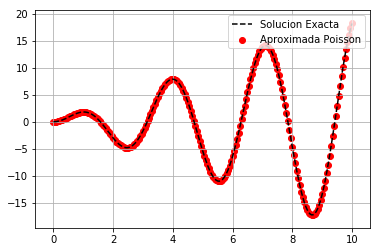

In [23]:
plt.plot(t,ye1,'--',c='k',label='Solucion Exacta')
plt.scatter(t,yf1,color='r',label='Aproximada Poisson')
plt.legend(loc=1)
plt.grid()

In [24]:
# Ejemplo 2
def Exact2(t):
    return np.cos(2*t)

ye2 = Exact2(t)
yf2,h = GetFiniteMethod(1.,0.,t,Source2)

0.05


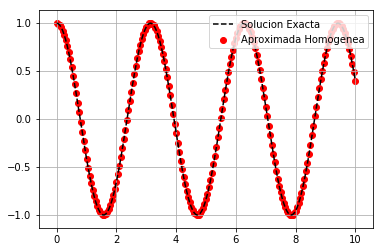

In [25]:
plt.plot(t,ye2,'--',c='k',label='Solucion Exacta')
plt.scatter(t,yf2,color='r',label='Aproximada Homogenea')
plt.legend(loc=1)
plt.grid()

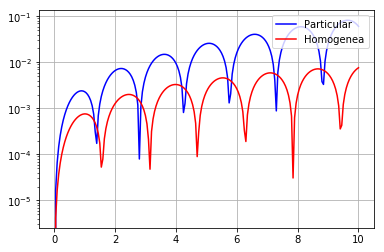

In [26]:
plt.plot(t,np.abs(ye1-yf1),c='b',label='Particular')
plt.plot(t,np.abs(ye2-yf2),c='r',label='Homogenea')
plt.legend(loc=1)
plt.yscale('log')
plt.grid()

In [27]:
print(h**2)
print(np.mean( np.abs(ye1-yf1) ))
print(np.mean( np.abs(ye2-yf2) ))

0.0025000000000000005
0.021265130656283687
0.002607635485411923
